## Plot dependences on main hyperparameters

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import shutil
import random
import seaborn as sns
import datetime 

sns.set( font_scale = 1.5, style='darkgrid', rc={"lines.linewidth": 3})

Using TensorFlow backend.


In [3]:
# Load Summary files
path='/storage/Crack_detection/Dataset2/Crack_detection/opt2/'
df=pd.read_csv(os.path.join(path, 'ModelsSummary.csv'))

## Dependence on learning rate (constant)

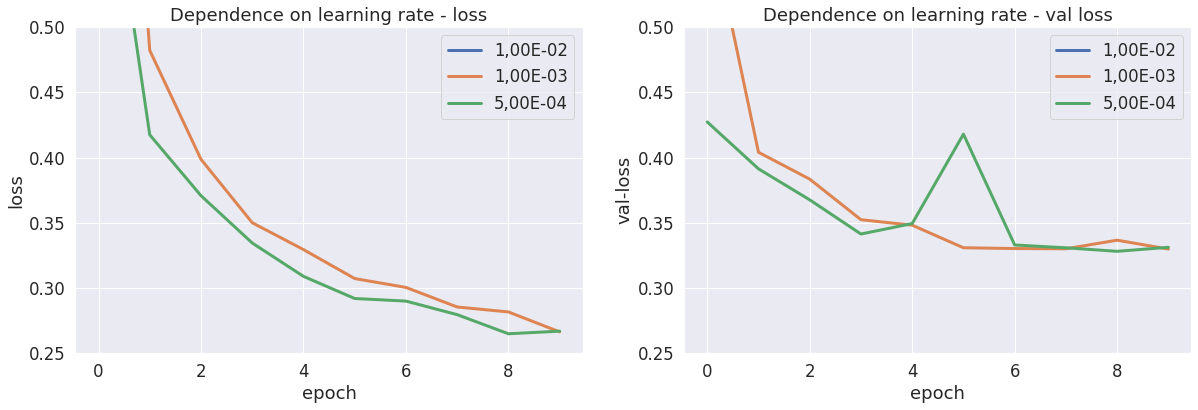

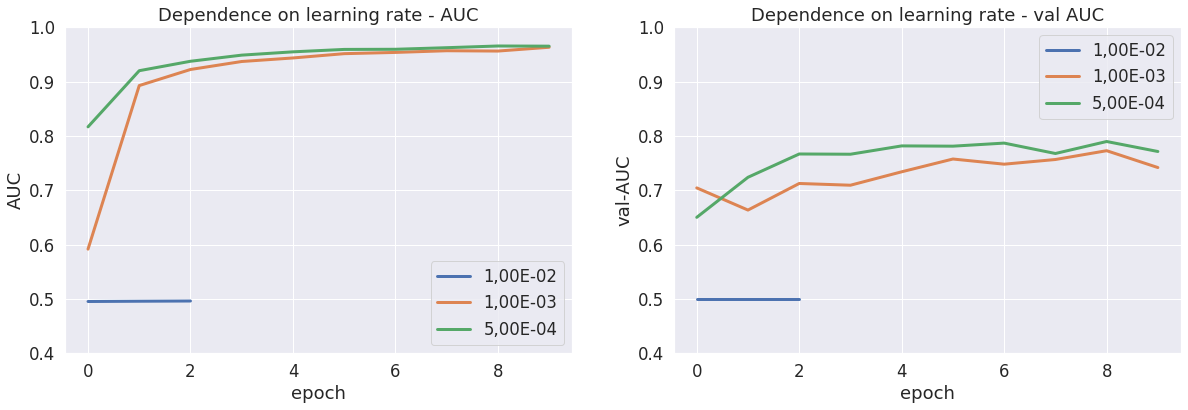

In [71]:
gdf=df[(df.model_index==0) | (df.model_index==1) | (df.model_index==7)].groupby('LR')
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.25,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.25,0.5)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.4,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.4,1)


## Learning rate exponential decay, dependence on decay step
### lr=lr0*decay_rate^(step/decay_step), lr0 = 1e-3, decay_rate = 0.92

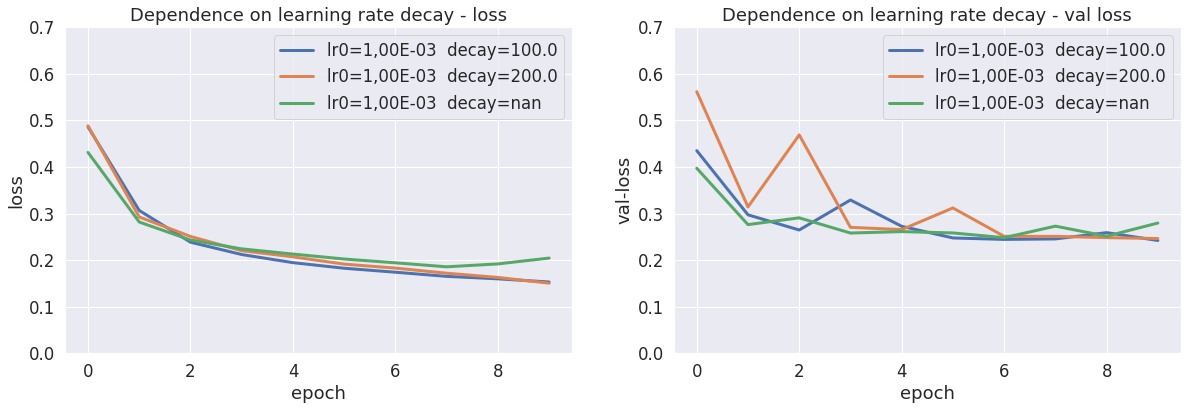

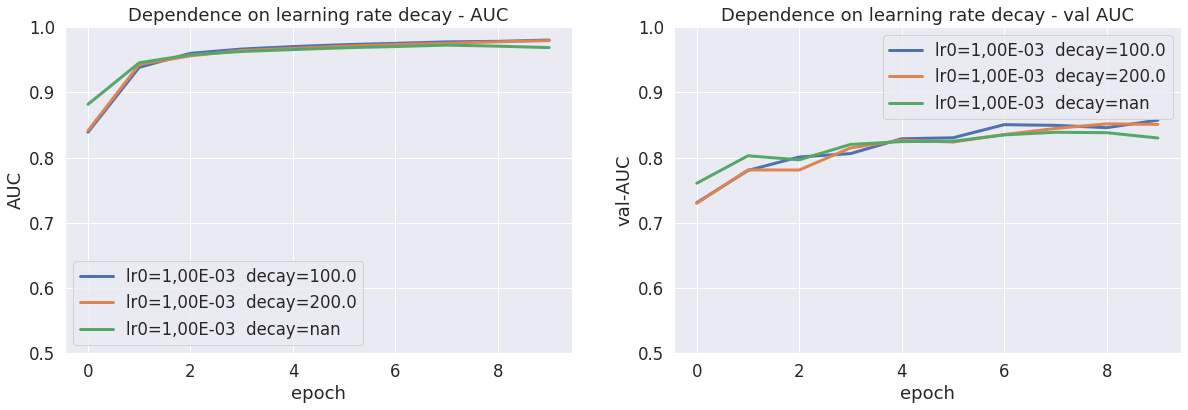

In [20]:
temp_df=df[(df.model_index==21) |  (df.model_index==30) | (df.model_index==31) ].copy()
temp_df=temp_df.assign(LR_decay = lambda x: ('lr0='+x['LR'].astype(str)+'  decay='+x['LR_step_dec'].astype(str)))
gdf=temp_df.groupby('LR_decay')

fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate decay - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.0,0.7)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate decay - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.,0.7)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate decay - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate decay - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)

## Plot dependence on BatchNormalization location: after or before ReLu activation function

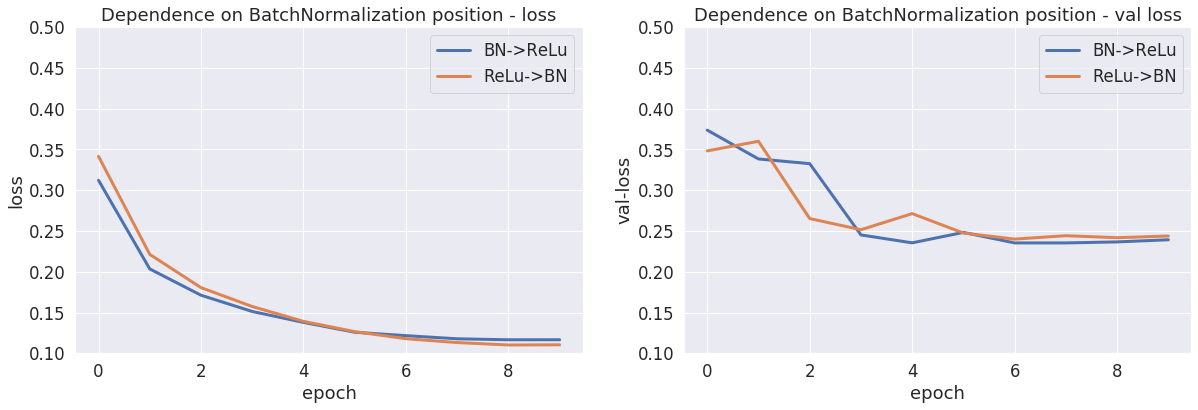

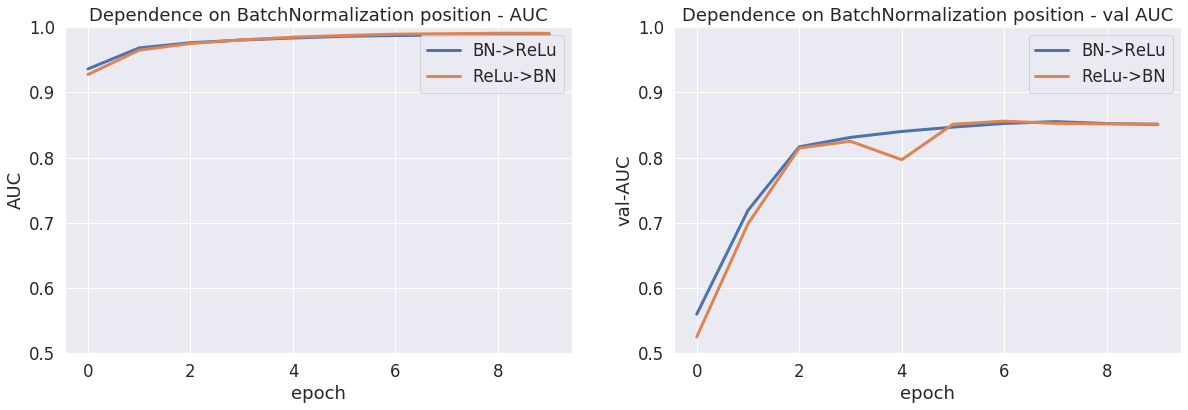

In [26]:
# model 19 & 41
temp_df=df[(df.model_index==19) | (df.model_index==41)].copy()
temp_df['BN_position']=temp_df.model_index.apply(lambda x: 'No BN' if x == 31 else ('ReLu->BN' if x==19 else 'BN->ReLu'))
gdf=temp_df.groupby('BN_position')
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on BatchNormalization position - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.1,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on BatchNormalization position - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.1,0.5)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on BatchNormalization position - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on BatchNormalization position - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)

## Learning rate exponential decay, dependence on decay step 
### lr=lr0*decay_rate^(step/decay_step), lr0 = 1e-3, decay_rate = 0.92

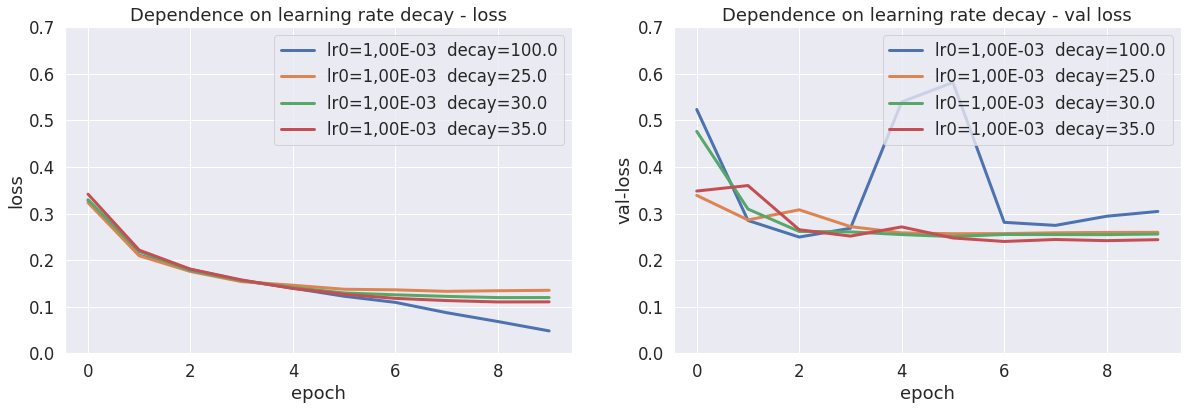

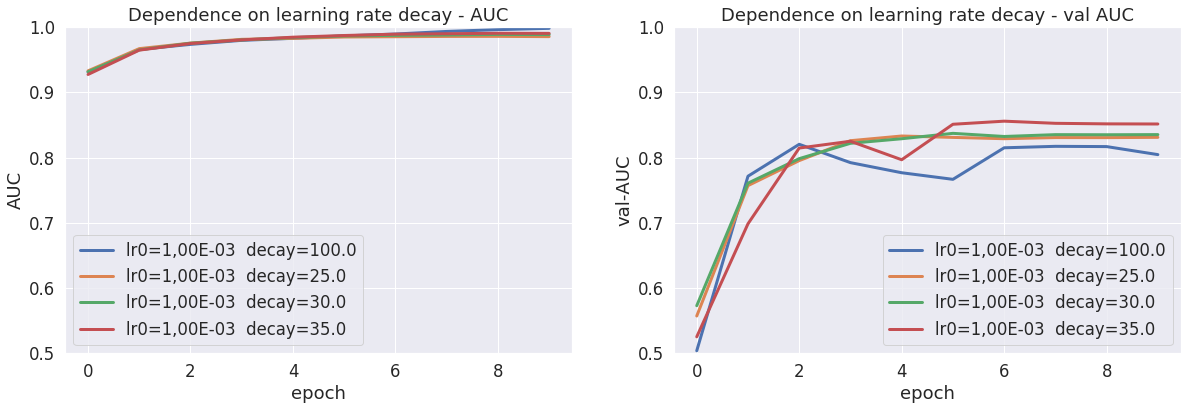

In [27]:
temp_df=df[(df.model_index==19) | (df.model_index==29)| (df.model_index==32) | (df.model_index==16) ].copy()
temp_df=temp_df.assign(LR_decay = lambda x: ('lr0='+x['LR'].astype(str)+'  decay='+x['LR_step_dec'].astype(str)))
gdf=temp_df.groupby('LR_decay')

fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate decay - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.0,0.7)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate decay - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.,0.7)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate decay - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate decay - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)

## Learning rate exponential decay, dependence on initial learning lr0 
### lr=lr0*decay_rate^(step/decay_step), decay_rate = 0.92, decay_step = 35

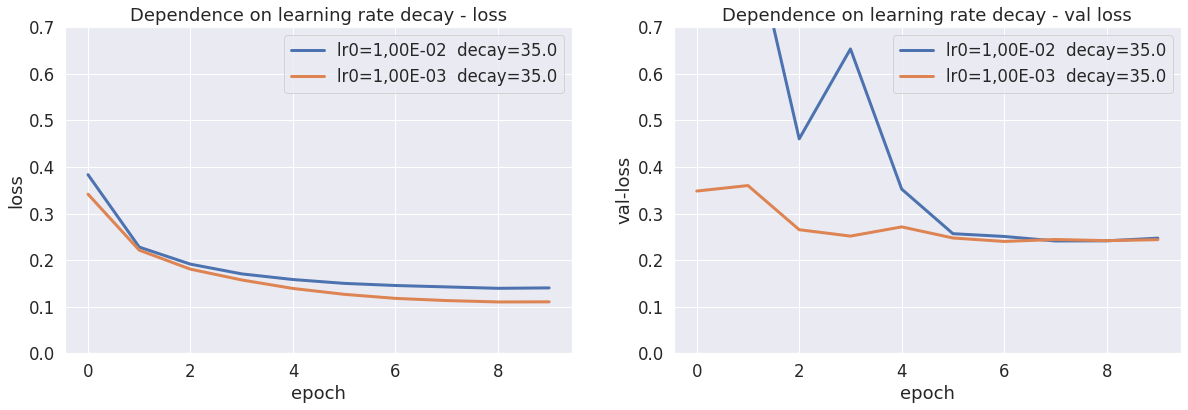

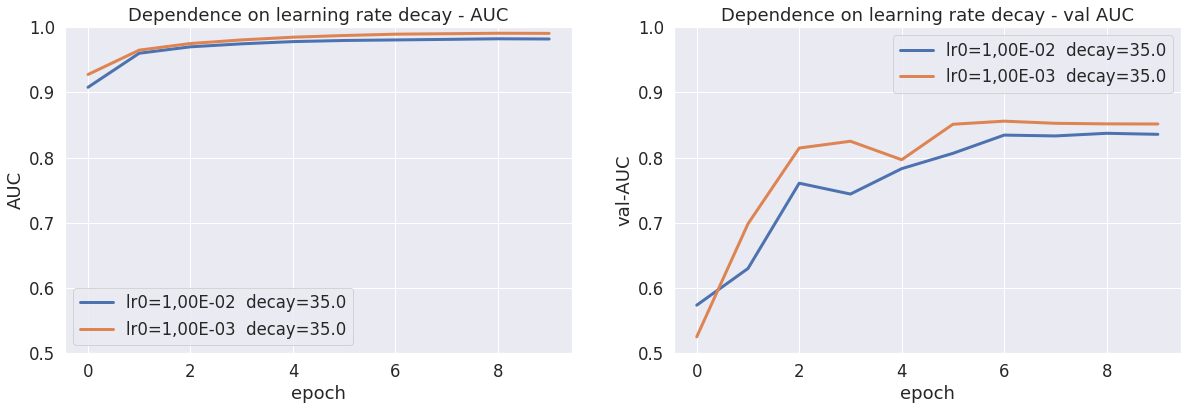

In [6]:
temp_df=df[(df.model_index==38) | (df.model_index==19)  ].copy()
temp_df=temp_df.assign(LR_decay = lambda x: ('lr0='+x['LR'].astype(str)+'  decay='+x['LR_step_dec'].astype(str)))
gdf=temp_df.groupby('LR_decay')

fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate decay - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.0,0.7)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate decay - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.,0.7)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate decay - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate decay - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)

## Plot impact of padding in convolutional layers 
#### note: 'same' padding helps to keep the features close to the edge of the images but results in a bigger network with more parameters (1.5M --> 2.8M)

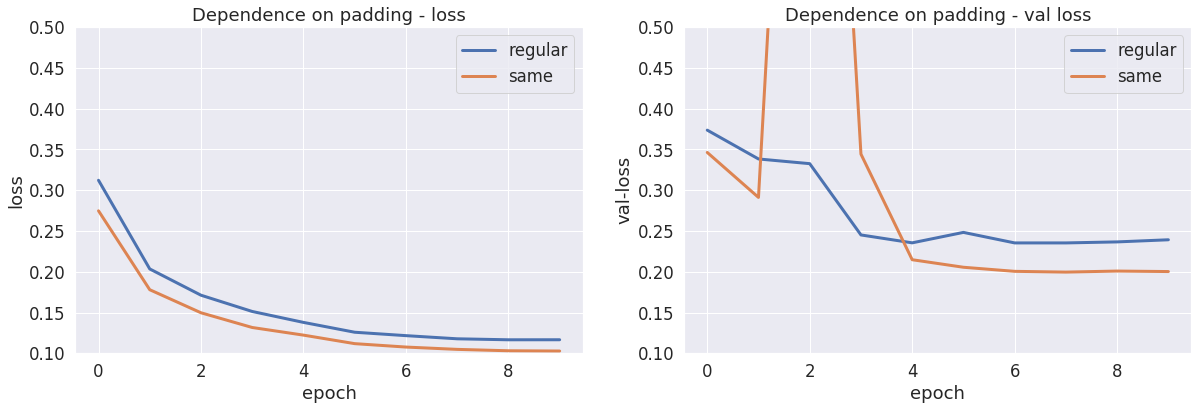

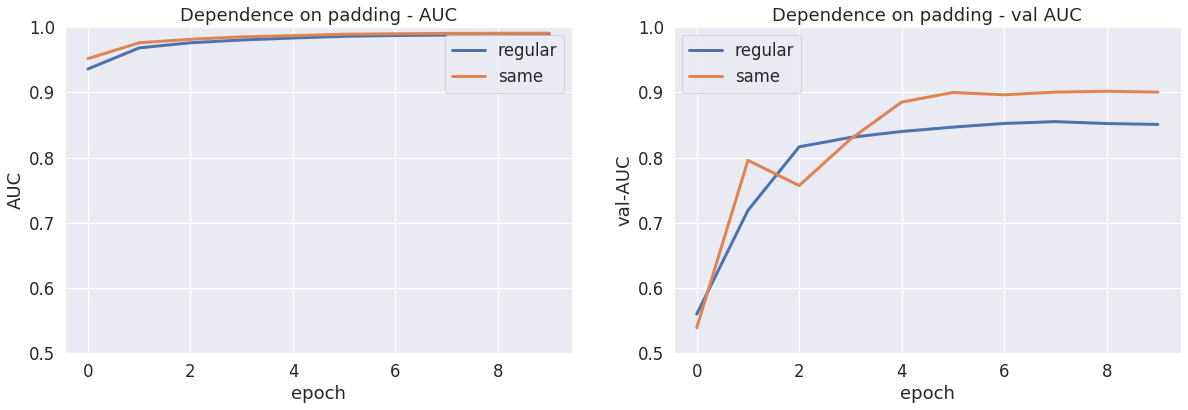

In [73]:
# model 41 & 44
temp_df=df[(df.model_index==41) | (df.model_index==44)].copy()
temp_df['padding']=temp_df.model_index.apply(lambda x: 'regular' if x==41 else 'same')
gdf=temp_df.groupby('padding')
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on padding - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.1,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on padding - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.1,0.5)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on padding - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on padding - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)

## Dependence on L2 regularization (only fully connected layer)

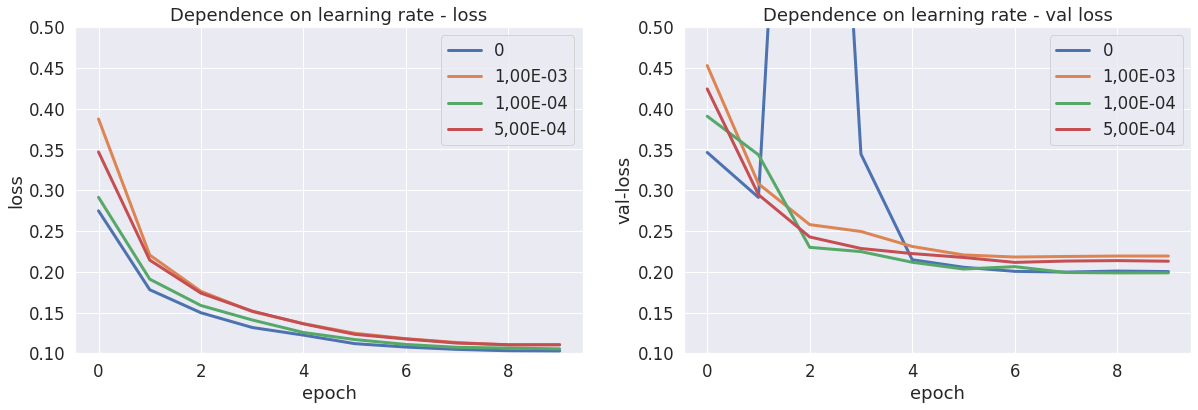

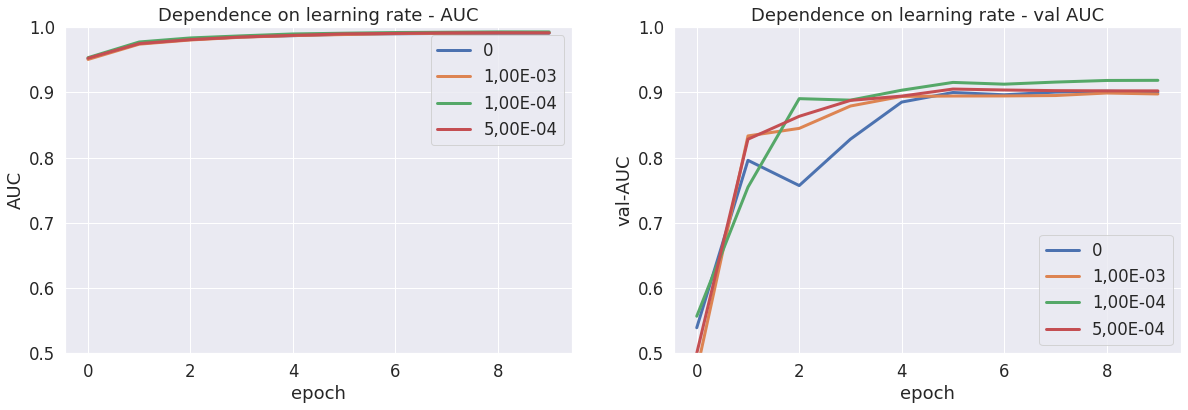

In [74]:
# model 42~45
gdf=df[(df.model_index==42) | (df.model_index==43) | (df.model_index==44) | (df.model_index==45)].groupby('L2-reg')
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.1,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.1,0.5)
    
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.5,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.5,1)